In [2]:
import numpy as np
import random
import argparse
import importlib
import os

import sys
sys.path.append('../')

from data.data import ImNetImageSamples
from utils.ply_utils import read_ply_point
from evaluation.eval import calculate_cd, calculate_normal_consistency

In [3]:
samples = ImNetImageSamples(
    data_path='../data/all_vox256_img/all_vox256_img_test.hdf5', 
    label_txt_path='../data/all_vox256_img/all_vox256_img_test.txt'
)

In [86]:
# Setup parameters 
cd_res_per_class_dict = dict([
    (name, []) 
    for name in list(set(map(lambda x: x.split('/')[0], samples.obj_paths)))
])

normal_cons_res_per_class_dict = dict([
    (name, []) 
    for name in list(set(map(lambda x: x.split('/')[0], samples.obj_paths)))
])

eval_args = [
    (
        samples.data_points[i][np.squeeze(samples.data_values[i] > 1e-4)], 
        os.path.join('/path/to/nt_test/origin_model_class_ae_ply', samples.obj_paths[i], 'obj_deformed.ply'), 
        os.path.join('/path/to/nt_test/origin_model_class_ae_ply', samples.obj_paths[i], 'obj_orginal.ply'), 
        samples.obj_paths[i]
    ) 
    for i in range(10)
]

In [114]:
indx = 1
vertices_gt, pd_ply, _, obj_path = eval_args[indx]
img = samples.data_pixels[indx]

samples.obj_paths[indx]

'02691156/d18f2aeae4146464bd46d022fd7d80aa'

In [115]:
vertices_pd = read_ply_point(pd_ply)

In [116]:
cd_calc = calculate_cd(vertices_pd, vertices_gt)
cd_calc

83.08817539550364

In [117]:
vertices_pd.shape, vertices_gt.shape

((1101, 3), (1258, 3))

In [99]:
(vertices_pd.mean(), vertices_pd.std()), (vertices_gt.mean(), vertices_gt.std()), 

((1.1443044, 5.277942), (-0.00892103, 0.11776469))

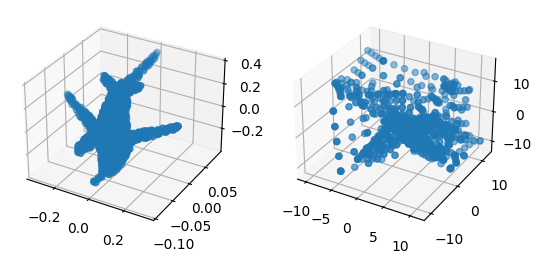

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

ax.scatter(vertices_gt[:, 0], vertices_gt[:, 1], vertices_gt[:, 2])
                                                             
                                                             
ax = fig.add_subplot(122, projection='3d')

ax.scatter(vertices_pd[:, 0], vertices_pd[:, 1], vertices_pd[:, 2])

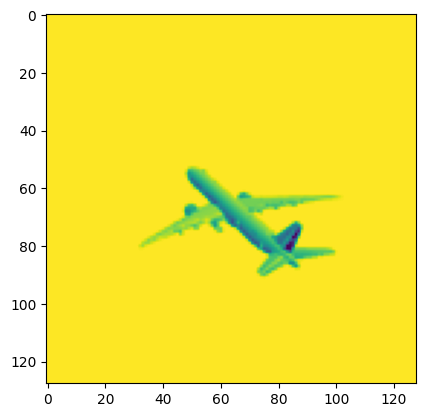

In [103]:
plt.imshow(img[-1, 0])